## Import Dependencies and Setting Up

In [1]:
#%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

city_ride_data = pd.merge(ride_data,city_data, on = 'city', how='outer')


# Display the data table for preview

city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

### Data Preparation

In [ ]:
# Data Preparation

#x is total numbers of rides per city
# y is average fare $
#colors by city tipes

ride_df = city_ride_data.groupby(['city', 'type']).agg({'ride_id': 'count', 'fare': 'mean', 'driver_count':'max'})

ride_df = ride_df.reset_index()

ride_df.columns = ['city','city_type','rides','avg_fare','driver_count']



ride_df.head()



### Plotting

In [ ]:


scatter_x = np.array(ride_df['rides'])
scatter_y = np.array(ride_df['avg_fare'])
group = np.array(ride_df['city_type'])
size = np.array(ride_df['driver_count'])

cdict = {'Urban': 'coral', 'Suburban': 'skyblue', 'Rural': 'gold'}

fig, ax = plt.subplots()

for g in np.unique(group):
    ix = np.where(group == g)
    area = (10 * size[ix])

    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = area,alpha=0.7, edgecolor='black', linewidth=1.1)
    
plt.legend(scatterpoints=1,  labelspacing=1, title='City Area')

plt.title('Ride Sharing Data (2016)')
plt.grid()
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")

ax.text(1.04, .75, 'Note\nCircle size correlates with driver count per city.', transform=ax.transAxes, fontsize=10)

# Save Figure
#plt.savefig('foo.png')
plt.savefig('Images/01_Ride_Sharing_Data.pdf', bbox_inches="tight")



## Total Fares by City Type

### Data Preparation

In [2]:
# Calculate Type Percents

city_type_df = city_ride_data.groupby(['type']).agg({'fare': 'sum'})

city_type_df = city_type_df.reset_index()

#city_type_df.columns = ['city','city_type','rides','avg_fare','driver_count']

city_type_total = city_type_df['fare'].sum()


city_type_df['percent'] = (city_type_df['fare']/city_type_total)*100

city_type_df.head()



,type,fare,percent
0,Rural,4327.93,6.811493
1,Suburban,19356.33,30.463872
2,Urban,39854.38,62.724635


### Plotting

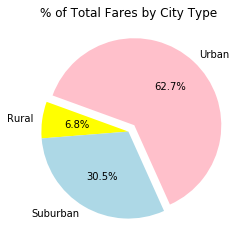

In [3]:
# Build Pie Chart

sizes = np.array(city_type_df['percent'])
labels = np.array(city_type_df['type'])

explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['yellow','lightblue','pink']

plt.pie(sizes, labels=labels,explode=explode, colors=colors, autopct='%.1f%%', startangle=160)

plt.title('% of Total Fares by City Type')

#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save Figure
plt.savefig('Images/02_Total_Fares_by_City_Type.pdf', bbox_inches="tight")


## Total Rides by City Type

### Data Preparation

In [4]:
# Calculate Rides Percents

city_type_rides_df = city_ride_data.groupby(['type']).agg({'ride_id': 'count'})

city_type_rides_df = city_type_rides_df.reset_index()

#city_type_df.columns = ['city','city_type','rides','avg_fare','driver_count']

city_type_total_rides = city_type_rides_df['ride_id'].sum()


city_type_rides_df['percent'] = (city_type_rides_df['ride_id']/city_type_total_rides)*100

city_type_rides_df.head()



,type,ride_id,percent
0,Rural,125,5.263158
1,Suburban,625,26.315789
2,Urban,1625,68.421053


### Plotting

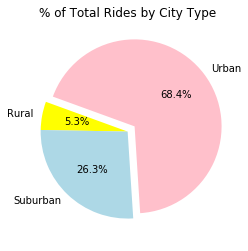

In [5]:
# Build Pie Chart

sizes = np.array(city_type_rides_df['percent'])
labels = np.array(city_type_rides_df['type'])

explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['yellow','lightblue','pink']

plt.pie(sizes, labels=labels,explode=explode, colors=colors, autopct='%.1f%%', startangle=160)

plt.title('% of Total Rides by City Type')

#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save Figure
plt.savefig('Images/03_Total_Rides_by_City_Type.pdf', bbox_inches="tight")



## Total Drivers by City Type

### Data Preparation

In [6]:
# Calculate Driver Percents

city_data

city_type_drivers_df = city_data.groupby(['type']).agg({'driver_count': 'sum'})

city_type_drivers_df = city_type_drivers_df.reset_index()


city_type_total_drivers = city_type_drivers_df['driver_count'].sum()


city_type_drivers_df['percent'] = (city_type_drivers_df['driver_count']/city_type_total_drivers)*100

city_type_drivers_df.head()



,type,driver_count,percent
0,Rural,78,2.623613
1,Suburban,490,16.481668
2,Urban,2405,80.894719


### Plotting

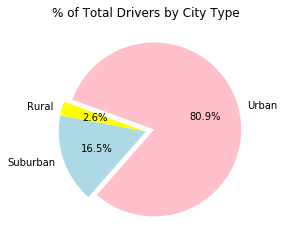

In [7]:
# Build Pie Chart

sizes = np.array(city_type_drivers_df['percent'])
labels = np.array(city_type_drivers_df['type'])

explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['yellow','lightblue','pink']

plt.pie(sizes, labels=labels,explode=explode, colors=colors, autopct='%.1f%%', startangle=160)

plt.title('% of Total Drivers by City Type')

#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save Figure
plt.savefig('Images/04_Total_Drivers_by_City_Type.pdf', bbox_inches="tight")

